# Load in packages

### Package requirements are as follows:
#### 1) NumPy (NUMerical PYthon): contains packages for handling multi-dimensional arrays see further documentation here: https://numpy.org/doc/stable/user/absolute_beginners.html

#### 2) Xarray: allows efficient handling of much larger, labeled multi-dimensional arrays. Contains "wrap-around" functions on numpy, as well as to handle different data formats e.g., netCDF4, HDF. Furthermore, allows efficient parallelisation of tasks, see documentation here: https://docs.xarray.dev/en/stable/. Note: you will need the additional packages "dask", "netCDF4" and "scipy" for this to work properly.

#### 3) Scikit-learn: Easily accessible and well-documented/maintained library for data science and statistical modelling, this is where the  Logistic Regression is! see documentation here: https://scikit-learn.org/stable/

#### 4) Matplotlib: for making all those nice plots, see documentation here: https://matplotlib.org/

In [20]:
## Generic packages that are on your operating system
import glob
import os
import time

## Additional required packages
import numpy as np
import xarray as xr
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Let's start with some basic numpy functions for categorizing data

### Let's bin some data into different categories, for this numpy's searchsorted function is your friend. See further documentation here: https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html

#### Steps:
####   1) Create a numpy array of size 10 containing uniformly distributed random integers between 0 and 10. We use numpy.random for this, see documentation here: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html
####   2) Choose categories e.g., <3, 3-5, 5-8, >8
####   3) Bin data

In [5]:
## Step 1

lower_bound = 0
upper_bound = 10
size = 10

random_data = np.random.randint(lower_bound, upper_bound, size=size)

print(random_data)


[1 8 9 4 7 4 6 8 4 5]


In [6]:
## Step 2
## If you read the documentation of numpy searchsorted, you will see that we need to define bins
## the bin should be the upper bound for our desired category 

bins = [3,5,8]



In [8]:
## Step 3
## Now simply use searchsorted! Check: does it make sense to you?
## Hint: bin label 0 corresponds to the first bin i.e., <3, label 1 corresponds
## to the second i.e., 3-5 and so on.

binned_data = np.searchsorted(bins,random_data)

print(binned_data)


[0 2 3 1 2 1 2 2 1 1]


# Load in netCDF files from the datasets folder

### First let's check which netCDF files are in the dataset folder right here. We can use the wildcard "*" (see here for more: https://www.ibm.com/docs/en/aix/7.2?topic=files-pattern-matching-wildcards-metacharacters) and search for all files ending with ".nc"

In [12]:
print(glob.glob("datasets/*.nc"))

['datasets/Region_avg_2018_obs_binned.nc', 'datasets/Region_avg_2020_IFS.nc', 'datasets/Region_avg_2018_IFS.nc', 'datasets/Region_avg_2020_cGAN.nc', 'datasets/Region_avg_2019_obs_binned.nc', 'datasets/Region_avg_2019_cGAN.nc', 'datasets/Region_avg_2020_obs_binned.nc', 'datasets/Region_avg_2018_cGAN.nc', 'datasets/Region_avg_2019_IFS.nc']


### You will see that the datasets folder contains model output that is already regionally averaged for years 2018, 2019 and 2020. These are the predictions of 24-hour accumulated rainfall for 1-day lead time. Binned observation data is also available for all years.
### Load in all years of each model (IFS and cGAN) as well as the binned observation data using xr.open_mfdataset (see documentation here: https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html)

In [2]:
## Load all years of IFS
files_IFS = glob.glob("datasets/Region_avg_*_IFS.nc")
ds_IFS = xr.open_mfdataset(files_IFS)

files_cGAN = "datasets/Region_avg_*_cGAN.nc"
ds_cGAN = xr.open_mfdataset(files_cGAN)

files_obs = "datasets/Region_avg_*_obs_binned.nc"
ds_obs = xr.open_mfdataset(files_obs)


## Data exploration: check the files, what is in them?

### First let's get a general overview, what are the dimensions, coordinates and data variables?

In [3]:
ds_IFS

<xarray.Dataset> Size: 2MB
Dimensions:        (time: 538, member: 50)
Coordinates:
  * time           (time) datetime64[ns] 4kB 2018-01-01 ... 2020-06-28
  * member         (member) int64 400B 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Data variables:
    Nairobi        (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Kiambu         (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Kajiado-North  (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Kajiado-East   (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Gode           (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Kelafo         (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>
    Mustahil       (time, member) float64 215kB dask.array<chunksize=(179, 50), meta=np.ndarray>

### Now let's get a list of the regions (i.e. each data variable) for IFS, cGAN and observations and check if they are the same

In [9]:
## We use list comprehensions to iterate and get each name of the data variable 
## (see section 5.1.4 here: https://docs.python.org/2/tutorial/datastructures.html for more details.

regions_IFS = [var for var in ds_IFS.data_vars]
regions_cGAN = [var for var in ds_cGAN.data_vars]
regions_obs = [var for var in ds_obs.data_vars]

print("Regions in IFS are:", regions_IFS)
print("Regions in cGAN are:", regions_IFS)
print("Regions in obs are:", regions_IFS)

Regions in IFS are: ['Nairobi', 'Kiambu', 'Kajiado-North', 'Kajiado-East', 'Gode', 'Kelafo', 'Mustahil']
Regions in cGAN are: ['Nairobi', 'Kiambu', 'Kajiado-North', 'Kajiado-East', 'Gode', 'Kelafo', 'Mustahil']
Regions in obs are: ['Nairobi', 'Kiambu', 'Kajiado-North', 'Kajiado-East', 'Gode', 'Kelafo', 'Mustahil']


# Fitting the logistic regression model

### Create the training data, we want 2 models: one for 'Nairobi', 'Kiambu', 'Kajiado-North' and one for 'Gode', 'Kelafo', 'Mustahil'

In [16]:
## We define a look-up list for each country with the regions of interest

regions_Kenya = ['Nairobi', 'Kiambu', 'Kajiado-North']
regions_Ethiopia = ['Gode', 'Kelafo', 'Mustahil']

## We then create the training data for IFS, starting with X (i.e., predictors)
## to do this we row-wise stack the regional values on top of each other
## see: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

X_data_IFS_Kenya = np.vstack(([ds_IFS[reg].values for reg in regions_Kenya]))
X_data_IFS_Ethiopia = np.vstack(([ds_IFS[reg].values for reg in regions_Ethiopia]))
X_data_cGAN_Kenya = np.vstack(([ds_cGAN[reg].values for reg in regions_Kenya]))
X_data_cGAN_Ethiopia = np.vstack(([ds_cGAN[reg].values for reg in regions_Ethiopia]))

## We do the same for y data i.e., observations, but this time column-wise
## Since observations are 1-D and do not have ensemble members

y_data_Kenya = np.hstack(([ds_obs[reg].values for reg in regions_Kenya]))
y_data_Ethiopia = np.hstack(([ds_obs[reg].values for reg in regions_Ethiopia]))



### Check the shapes of the created arrays, the first dimension should be the number of samples i.e., number of timesteps * number of regions. The second dimension for the X variable should be number of features i.e., number of ensemble members.

In [17]:
## Check that the shapes make sense

print("X data for IFS has shapes for Kenya and Ethiopia resp.: ", X_data_IFS_Kenya.shape, X_data_IFS_Ethiopia.shape)
print("X data for cGAN has shapes for Kenya and Ethiopia resp.: ", X_data_cGAN_Kenya.shape, X_data_cGAN_Ethiopia.shape)
print("y data for IFS has shape sfor Kenya and Ethiopia resp.: ", y_data_Kenya.shape, y_data_Ethiopia.shape)



X data for IFS has shape for Kenya and Ethiopia resp.:  (1614, 50) (1614, 50)
X data for cGAN has shape for Kenya and Ethiopia resp.:  (1614, 50) (1614, 50)
y data for IFS has shape for Kenya and Ethiopia resp.:  (1614,) (1614,)


### Finally let's fit the Logistic Regression model for IFS and cGAN over the regions. 
#### See the LogisticRegression documentation here: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html. We use the penalty="elasticnet" which balances between l1 and l2 penalisation as controlled by the l1_ratio parameter, where:
#### l1_ration=1: Purely l1 penalisation which prevents fitted coefficients from deviating too much from each other
#### l1_ration=0: Purely l2 penalisation which prevents high coefficient values
#### A balance between the two allows for a well-generalizable model that is less likely to overfit, this however depends on your training sample. The penalty "elasticnet" only works with the solver=saga where saga uses the Stochastically Averaged Gradient descent method, see reference here: https://www.di.ens.fr/~fbach/Defazio_NIPS2014.pdf

In [96]:
start_time = time.time()
print("Starting with fitting for IFS over both regions")
## Fit IFS model
model_IFS_kenya = LogisticRegression(\
    penalty='elasticnet',l1_ratio=0.2,solver='saga',max_iter=100_000).fit(X_data_IFS_Kenya,y_data_Kenya)
model_IFS_ethiopia = LogisticRegression(\
    penalty='elasticnet',l1_ratio=0.7,solver='saga',max_iter=100_000).fit(X_data_IFS_Ethiopia,y_data_Ethiopia)
print("Finished fitting for IFS over both regions in ----",time.time()-start_time,"s---")

start_time = time.time()
print("Starting with fitting for cGAN over both regions")
## Fit cGAN model
model_cGAN_kenya = LogisticRegression(\
    penalty='elasticnet',l1_ratio=0.2,solver='saga',max_iter=100_000).fit(X_data_cGAN_Kenya,y_data_Kenya)
model_cGAN_ethiopia = LogisticRegression(\
    penalty='elasticnet',l1_ratio=0.7,solver='saga',max_iter=100_000).fit(X_data_cGAN_Ethiopia,y_data_Ethiopia)
print("Finished fitting for cGAN over both regions in ----",time.time()-start_time,"s---")



Starting with fitting for IFS over both regions
Finished fitting for IFS over both regions in ---- 13.200083017349243 s---
Starting with fitting for cGAN over both regions
Finished fitting for cGAN over both regions in ---- 14.812351942062378 s---


# Plot calibration curves

### We first get our predicted probabilities of occurrences and our true occurrences

In [100]:
## Define the bin for which we plot the calibraiton curve (i.e., 0, 1, 2, 3 for <5, 5-20, 20-50 and >50 respectively)
bin_to_plot = 1

## We get the true probabilities of occurrence for this bin as is in our y-vales
## we use np.where for this, see documentation here: https://numpy.org/doc/stable/reference/generated/numpy.where.html
actual_probabilities_kenya = np.where(y_data_Kenya==bin_to_plot,1,0)
actual_probabilities_ethiopia = np.where(y_data_Ethiopia==bin_to_plot,1,0)

## Now we get the predicted probabilities from the fitted models using the function predict_proba and
## The output of predict proba is of the shape (n_samples, n_bins) and we select our bin (i.e., [:,bin_to_plot] of interest
pred_probabilities_kenya_IFS = model_IFS_kenya.predict_proba(X_data_IFS_Kenya)[:,bin_to_plot]
pred_probabilities_ethiopia_IFS = model_IFS_ethiopia.predict_proba(X_data_IFS_Ethiopia)[:,bin_to_plot]
pred_probabilities_kenya_cGAN = model_cGAN_kenya.predict_proba(X_data_cGAN_Kenya)[:,bin_to_plot]
pred_probabilities_ethiopia_cGAN = model_cGAN_ethiopia.predict_proba(X_data_cGAN_Ethiopia)[:,bin_to_plot]



### We then use the sklearn function to then get the probability of occurrences and fraction of positives, see documentation here: https://scikit-learn.org/1.5/modules/generated/sklearn.calibration.calibration_curve.html

In [101]:
## Using the notation fop = fraction of positives and po = probability of occurrence
## Start with IFS
fop_IFS_Kenya, po_IFS_Kenya = calibration_curve(actual_probabilities_kenya,pred_probabilities_kenya_IFS,n_bins=5)
fop_IFS_Ethiopia, po_IFS_Ethiopia = calibration_curve(actual_probabilities_ethiopia,pred_probabilities_ethiopia_IFS,n_bins=5)

## Now cGAN
fop_cGAN_Kenya, po_cGAN_Kenya = calibration_curve(actual_probabilities_kenya,pred_probabilities_kenya_cGAN,n_bins=5)
fop_cGAN_Ethiopia, po_cGAN_Ethiopia = calibration_curve(actual_probabilities_ethiopia,pred_probabilities_ethiopia_cGAN,n_bins=5)


### Finally, make the plot

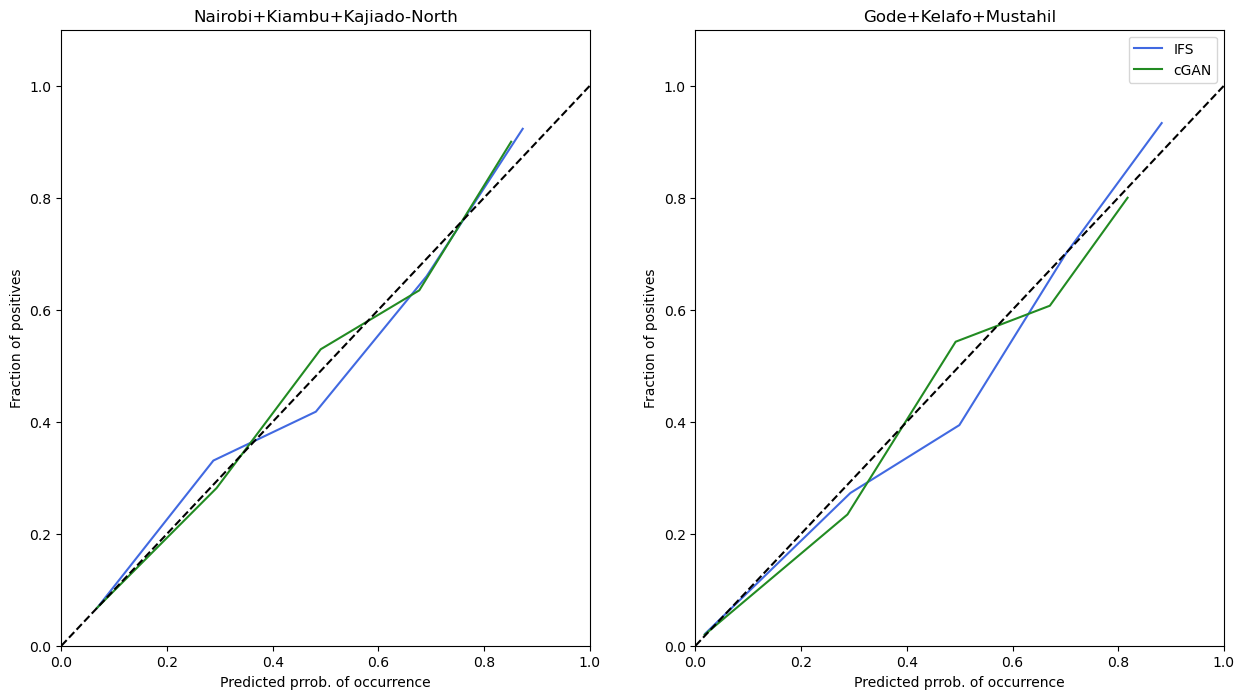

In [102]:
fig = plt.figure(figsize=(15,8))

ax_Kenya = fig.add_subplot(1,2,1)
ax_Kenya.set_title('Nairobi+Kiambu+Kajiado-North')
ax_Kenya.set_xlim(0,1)
ax_Kenya.set_ylim(0,1.1)

ax_Ethiopia = fig.add_subplot(1,2,2)
ax_Ethiopia.set_title('Gode+Kelafo+Mustahil')
ax_Ethiopia.set_xlim(0,1)
ax_Ethiopia.set_ylim(0,1.1)

ax_Kenya.plot(po_IFS_Kenya, fop_IFS_Kenya, color='royalblue', label='IFS')
ax_Kenya.plot(po_cGAN_Kenya, fop_cGAN_Kenya, color='forestgreen', label='cGAN')
ax_Kenya.plot([0,1],[0,1],linestyle='dashed',color='black')
ax_Kenya.set_xlabel('Predicted prrob. of occurrence')
ax_Kenya.set_ylabel('Fraction of positives')

ax_Ethiopia.plot(po_IFS_Ethiopia, fop_IFS_Ethiopia, color='royalblue', label='IFS')
ax_Ethiopia.plot(po_cGAN_Ethiopia, fop_cGAN_Ethiopia, color='forestgreen', label='cGAN')
ax_Ethiopia.plot([0,1],[0,1],linestyle='dashed',color='black')
ax_Ethiopia.set_xlabel('Predicted prrob. of occurrence')
ax_Ethiopia.set_ylabel('Fraction of positives')
ax_Ethiopia.legend()


